# Debugging Reflection distribution of the FOXSISIM at passing rays

### @Milo Dec, 2017

### Task 2:

Check the angular distribution of the rays after they hit the optics module.<br>

To check the previous test were the randomness of the source was tested, <a href="https://github.com/pymilo/Milo_RayTracing/blob/master/Notebooks/Source_Debuging_00.ipynb">check this notebook.</a>

Let's create first an on-axis source with the default parameters:

In [95]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1000           ## cm
offaxisAngle = 0.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)

r0 =  5.340631866960363
r1 =  3.36


In [96]:
module.passRays(rays)

### List of rays parameters:

In [97]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

### Chosing those rays that are not dead and hit the Hyp/Par mirror

In [98]:
Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

### Ploting on-axis at 100m

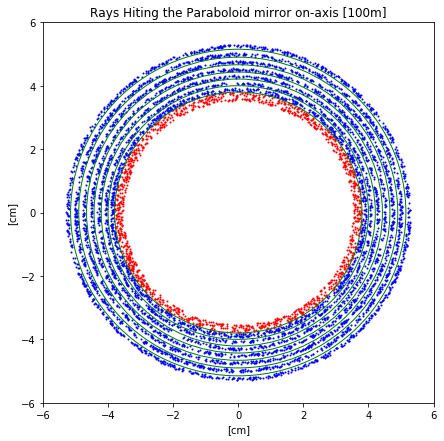

In [105]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)


# Plot random points
plt.scatter(Hx,Hy,s=1,color='r')
plt.scatter(Px,Py,s=1,color='b')
plt.title('Rays Hiting the Paraboloid mirror on-axis [100m]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# On-axis with source at 1AU

In [138]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
#Sdist = -1e4
offaxisAngle = 0.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [139]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
hrays = [ray.hist for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

### Plotting on-axis at 1AU

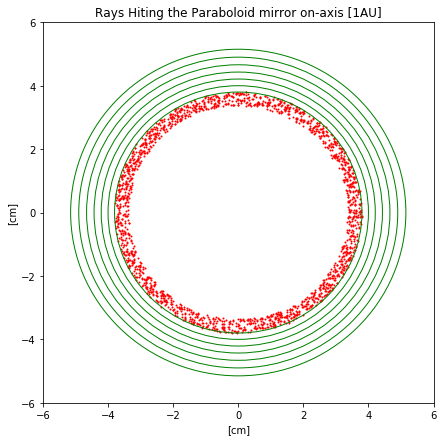

In [140]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)


# Plot random points
plt.scatter(Hx,Hy,s=1,color='r')
plt.scatter(Px,Py,s=1,color='b')
plt.title('Rays Hiting the Paraboloid mirror on-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

**Conclusion:** This make sense, once really far away (close to a ray-parallel configuration) there are not singly reflected rays coming from the Parabolid segment, and the singly reflected rays from the hyperboloid are killed by the back side of the inner shells, except the most inner one, in which case rays will be killed at the back core blocker.

# 30' Off-axis [100m]

In [141]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1000           ## cm
offaxisAngle = 30.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)

r0 =  5.340631866960363
r1 =  3.36


In [142]:
module.passRays(rays)

In [143]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

### Plotting

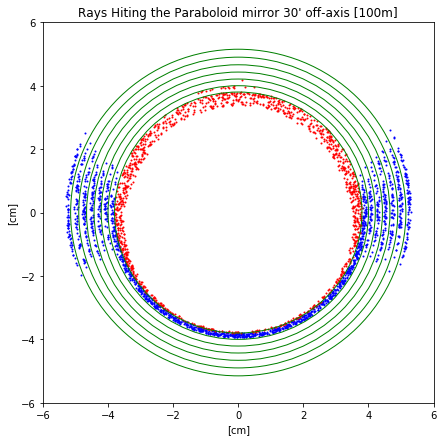

In [146]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=1,color='b')
plt.scatter(Hx,Hy,s=1,color='r')
plt.title('Rays Hiting the Paraboloid mirror 30\' off-axis [100m]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# 30' Off-axis [1AU]

In [147]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
offaxisAngle = 30.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [148]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

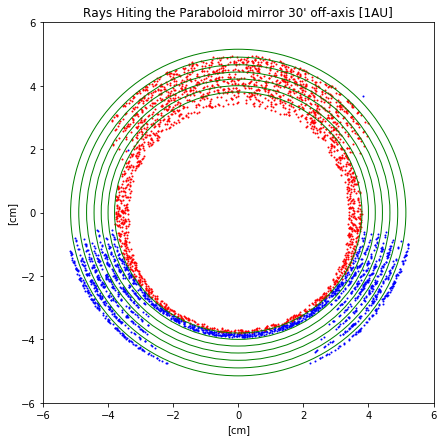

In [150]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=1,color='b')
plt.scatter(Hx,Hy,s=1,color='r')
plt.title('Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# 10' arcmin Off-axis [1AU]

In [151]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
offaxisAngle = 10.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [152]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

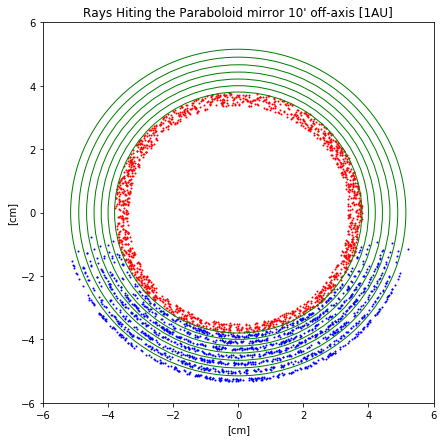

In [153]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=1,color='b')
plt.scatter(Hx,Hy,s=1,color='r')
plt.title('Rays Hiting the Paraboloid mirror 10\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# 15' Off-axis [1UA]

In [154]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
offaxisAngle = 15.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [155]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

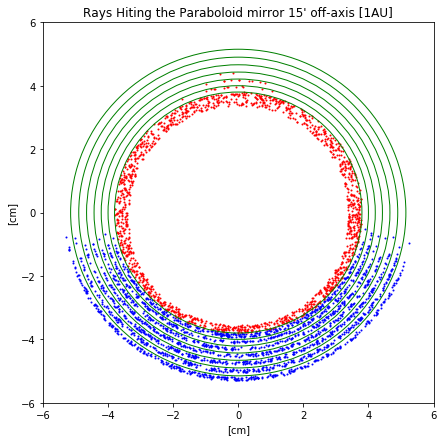

In [156]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=1,color='b')
plt.scatter(Hx,Hy,s=1,color='r')
plt.title('Rays Hiting the Paraboloid mirror 15\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# 20' Off-axis [1AU]

In [157]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
offaxisAngle = 20.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 10000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [158]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

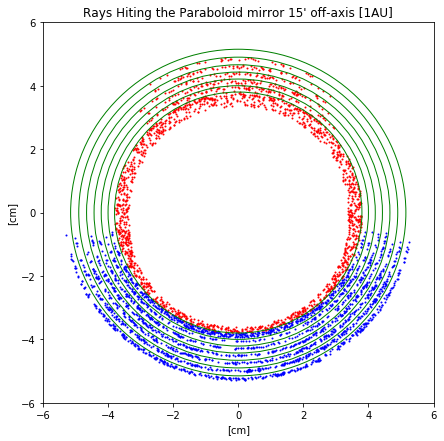

In [159]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=1,color='b')
plt.scatter(Hx,Hy,s=1,color='r')
plt.title('Rays Hiting the Paraboloid mirror 15\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

# 30' Off-axis [1UA] Many Many Rays

In [160]:
import numpy as np
from foxsisim.source import Source
from foxsisim.module import Module
#source = Source(type='point')
Sdist = -1.5e13           ## cm
offaxisAngle = 30.0     ## arcmin
source = Source(type='point',center=[0, -Sdist * np.sin(np.deg2rad(offaxisAngle / 60.0)), Sdist ])
module = Module(core_radius=3.36)
n = 1000000
rays = source.generateRays(module.targetFront,n)
module.passRays(rays)

r0 =  5.340631866960363
r1 =  3.36


In [161]:
prays = [ray.pos for ray in rays]
orays = [ray.ori for ray in rays]
srays = [ray.src for ray in rays]
drays = [ray.des for ray in rays]
trays = [ray.tag for ray in rays]
brays = [ray.bounces for ray in rays]
deadrays = [ray.dead for ray in rays]

Hrays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Hy' )]
Prays = [ray for ray in rays if (ray.dead==False and ray.bounces ==1 and ray.tag[-2:] == 'Pa' )]
Hx, Hy = np.array([ray.pos[0] for ray in Hrays]), np.array([ray.pos[1] for ray in Hrays])
Px, Py = np.array([ray.pos[0] for ray in Prays]), np.array([ray.pos[1] for ray in Prays])

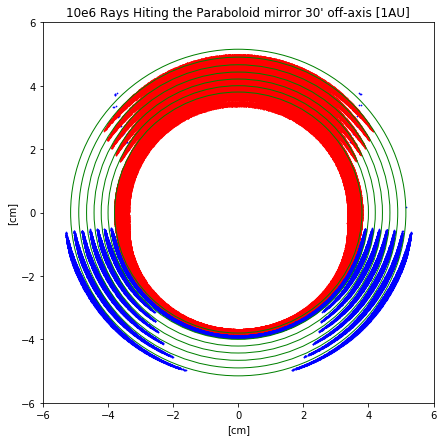

In [163]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7,7))
ax = fig.gca()
# Plot Shells
FrontRadii = [5.345, 5.085, 4.835, 4.595, 4.365, 4.15, 3.94]
InterRadii = [5.15, 4.9, 4.66, 4.43, 4.21, 4.0, 3.8]
InnerRadii = [4.56, 4.335, 4.125, 3.92, 3.725, 3.54, 3.36 ]
for r in InterRadii:
    c = plt.Circle((0, 0), r, color='g',fill=False)
    ax.add_artist(c)

# Plot random points
plt.scatter(Px,Py,s=0.5,color='b')
plt.scatter(Hx,Hy,s=0.5,color='r')
plt.title('10e6 Rays Hiting the Paraboloid mirror 30\' off-axis [1AU]')
plt.xlabel('[cm]')
plt.ylabel('[cm]')
plt.xlim(-6,6);plt.ylim(-6,6)
plt.show()

This take a while. Maybe we can use the rays saved in the CSV files to make this kind of plots. This is going to be done in the next Notebook: **Source_Debuging_02**